# Titanic - Machine Learning from Disaster

**D2APR: Aprendizado de Máquina e Reconhecimento de Padrões**

Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

## 1. Informações Gerais

### 1.1. Contexto do problema
O naufrágio do Titanic é um dos naufrágios mais famosos da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o considerado "inafundável" RMS Titanic afundou após colidir com um *iceberg*. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

O desafio é construir um modelo preditivo de classificação que responda à seguinte pergunta: "Que tipo de pessoa tem mais probabilidade de sobreviver?" usando os atributos de cada um dos passageiros. Como métrica de validação, vamos utilizar a acurácia.

Esse problema faz parte de uma competição bastante famosa do [Kaggle](https://www.kaggle.com/c/titanic)

Fonte:
* [Titanic - Overview](https://www.kaggle.com/c/titanic/overview)

### 1.2. Conhecendo o dataset

O [Dataset](https://www.kaggle.com/c/titanic/data) está dividido entre treino e teste. Os dados de treino possuem 891 registros divididos em 12 colunas e os dados de teste 418 registros com 11 colunas. A coluna faltante nos dados de teste é  da variável dependente *Surviver*.

#### 1.2.1 Atributos e seus tipos

As 12 colunas do conjunto de dados são as seguintes:

* PassengerId (int): Id do passageiro
* Survived (bool): Se o passageiro sobreviveu `(0 = Não, 1 = Sim)`
* Pclass (int): Classe do ticket `(1 = 1ª classe (alto), 2 = 2ª classe (médio), 3 = 3ª classe (baixo))`
* Name (string): Nome do passageiro
* Sex (string): Sexo do passageiro `(male, female)`
* Age (float): Idade do passageiro em anos
* SibSp (int): Quantidade de irmãos ou companheiros a bordo do Titanic
* Parch (int): Quantidade de pais ou filhos a bordo do Titanic
* Ticket (string): Número do ticket
* Fare (float): Tarifa do passageiro
* Cabin (string): Número da cabine
* Embarked (string): Porto de embarque `(C = Cherbourg, Q = Queenstown, S = Southampton)`

Algumas informações adicionais referente aos atributos
* A idade é fracionada se menor que 1. Se a idade foi estimada ela está na forma de xx.5
* Para a variável *SibSp* foram considerados irmãos as relações de irmão, irmã, meio-irmão e meia-irmã e para companheiro marido e mulher, de modo que noivos e amantes foram ignorados
* Para a variável *Parch* foram considerados como pais apenas mãe e pai e como filhos apenas filha, filho, enteado e enteada. Algumas crianças viajavam apenas com a babá, nesses casos *Parch = 0*

### 1.3. Objetivo

O objetivo desse estudo é verificar a possibilidade de prever se dado passageiro sobreviveria ou não (*Survived*) no acidente do Titanic com base em suas características.

## 2. Pré-processamento

### 2.1. Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuração de estilo dos gráficos
sns.set_theme(
    style='white',
    rc={
        'axes.titlesize': 16,
        'axes.labelsize': 12,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': False,
        'axes.grid.axis': 'y',
        'axes.spines.top': False
    }
)

In [3]:
#Importando os datasets
df_train = pd.read_csv('https://raw.githubusercontent.com/ciencia-dados-ifsp-grupo5/Titanic/main/Data/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ciencia-dados-ifsp-grupo5/Titanic/main/Data/test.csv')

#Tornando PassengerId como index
df_train.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)

print(f'O dataset de treino possui {df_train.shape[0]} linhas e {df_train.shape[1]} colunas')
print(f'O dataset de teste possui {df_test.shape[0]} linhas e {df_test.shape[1]} colunas')

O dataset de treino possui 891 linhas e 11 colunas
O dataset de teste possui 418 linhas e 10 colunas


In [4]:
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### 2.2. Visão geral dos dados

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
# Dados nulos
print(f'O dataset possui {df_train.isnull().sum().sum()} valores Nulos')

O dataset possui 866 valores Nulos


In [8]:
df_train.isnull().sum()[lambda x: x > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Dados duplicados
print(f'O dataset possui {df_train.duplicated().sum()} dados duplicados')

O dataset possui 0 dados duplicados


O *dataset* de treino não possui dados duplicados, porém existem **866 valores nulos**, distribuidos nas colunas:

- Age: 177 registros nulos
- Cabin: 687 registros nulos
- Embarked: 2 registros nulos

Esses dados serão tratados posteriormente

## 3. Análise exploratória

In [10]:
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 3.1. Distribuição da variável alvo *Survived*

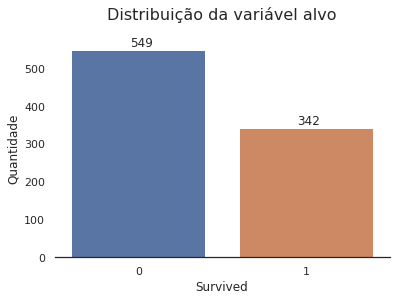

In [11]:
target = 'Survived'
target_counts = df_train[target].value_counts()

ax = sns.countplot(data=df_train, x="Survived")
for p, label in zip(ax.patches, target_counts):
    ax.annotate(label, xy=(p.get_x() + 0.35, p.get_height() + 10))

ax.set_title('Distribuição da variável alvo', pad=20)
ax.set_ylabel('Quantidade')
plt.show()

### 3.2. Variáveis numéricas

In [12]:
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [13]:
# Estatísticas descritivas
df_train[numerical_columns].describe().round(2)

,Age,SibSp,Parch,Fare
count,714.00,891.00,891.00,891.00
mean,29.70,0.52,0.38,32.20
std,14.53,1.10,0.81,49.69
min,0.42,0.00,0.00,0.00
25%,20.12,0.00,0.00,7.91
50%,28.00,0.00,0.00,14.45
75%,38.00,1.00,0.00,31.00
max,80.00,8.00,6.00,512.33


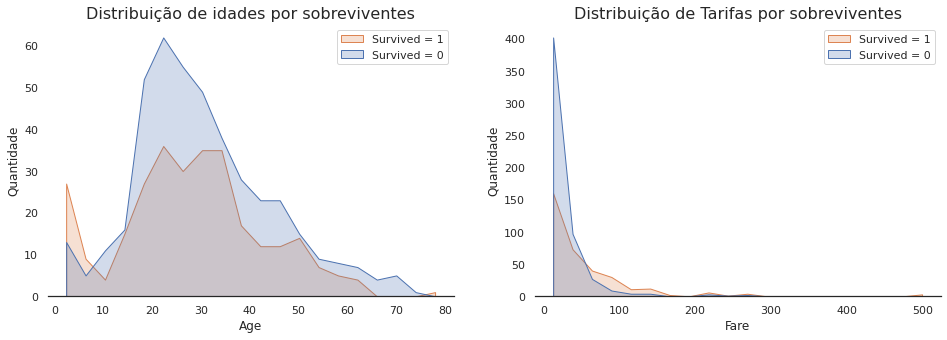

In [14]:
#Variáveis contínuas
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

#Gráfico de idade
sns.histplot(data=df_train, x='Age', hue='Survived', shrink=.8, ax=ax[0], element="poly", bins=20)
ax[0].set_title('Distribuição de idades por sobreviventes')
ax[0].set_ylabel('Quantidade')
ax[0].legend(labels=['Survived = 1', 'Survived = 0'], loc='upper right')

#Gráfico de Tarifas
sns.histplot(data=df_train, x='Fare', hue='Survived', shrink=.8, ax=ax[1], element="poly", bins=20)
ax[1].set_title('Distribuição de Tarifas por sobreviventes')
ax[1].set_ylabel('Quantidade')
ax[1].legend(labels=['Survived = 1','Survived = 0'], loc='upper right')

plt.show()

Excetuando crianças pequenas até aproximadamente 5 anos, para todas as outras idades o número de mortos foi maior que o de sobreviventes.

Quanto ao valor da tarifa, apesar de boa parte dos valores estarem próximos, é possível notar que a partir de um certo ponto, passageiros que pagaram tarifas maiores sobreviveram em uma proporção maior do que morreram.

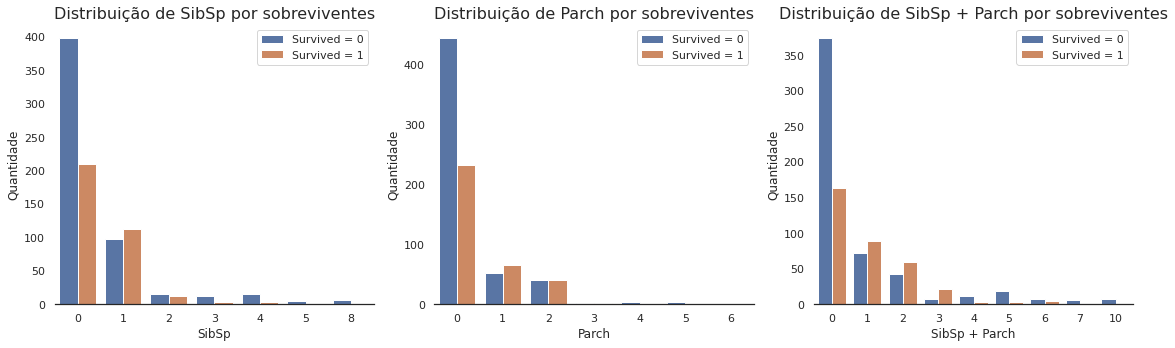

In [15]:
#Variáveis discretas
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

#Gráfico de SibSp
sns.countplot(data=df_train, x='SibSp', hue='Survived', ax=ax[0])
ax[0].set_title('Distribuição de SibSp por sobreviventes')
ax[0].set_ylabel('Quantidade')
ax[0].legend(labels=['Survived = 0', 'Survived = 1'],loc='upper right')

#Gráfico de Parch
sns.countplot(data=df_train, x='Parch', hue='Survived', ax=ax[1])
ax[1].set_title('Distribuição de Parch por sobreviventes')
ax[1].set_ylabel('Quantidade')
ax[1].legend(labels=['Survived = 0', 'Survived = 1'], loc='upper right')

#Gráfico de Parch
sns.countplot(data=df_train, x=df_train['SibSp'] + df_train['Parch'], hue='Survived', ax=ax[2])
ax[2].set_title('Distribuição de SibSp + Parch por sobreviventes')
ax[2].set_ylabel('Quantidade')
ax[2].set_xlabel('SibSp + Parch')
ax[2].legend(labels=['Survived = 0', 'Survived = 1'], loc='upper right')

plt.tight_layout()
plt.show()

As duas variáveis de "familiares" a bordo do navio possuem distribuição muito similar entre elas. Viajantes solitários tiveram uma maior taxa de morte. Quem estava acompanhado de famílias pequenas (1 a 3 acompanhantes) sobreviveu mais do que morreu. Já os membros de famílias mais numerosas (mais de 4 acompanhantes) não tiveram tanto sucesso em sobreviver.

### 3.3. Variáveis categóricas

In [16]:
categorical_columns = ['Pclass', 'Sex', 'Embarked']

In [17]:
# Distribuição
for column in categorical_columns:
    print(f'{df_train[column].value_counts()}\n')

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64



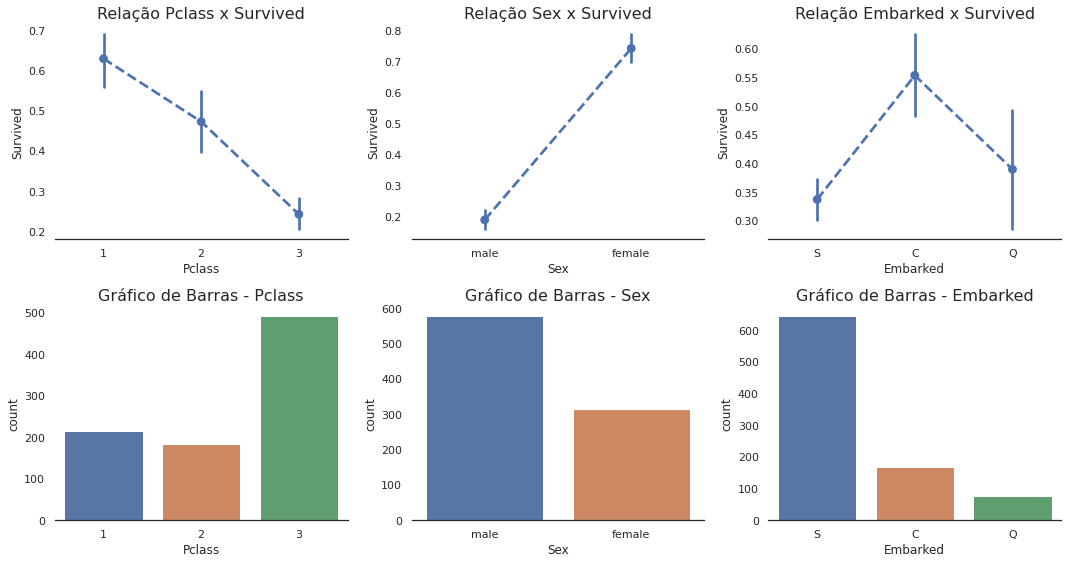

In [18]:
#Variáveis Categóricas
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# Gráfico de Pclass - Relação
sns.pointplot(x="Pclass", y="Survived", data=df_train, ax=ax[0,0], linestyles='--')
ax[0,0].set_title('Relação Pclass x Survived')

# Gráfico de Pclass - Barras
sns.countplot(x="Pclass", data=df_train, ax=ax[1,0])
ax[1,0].set_title('Gráfico de Barras - Pclass')

# Gráfico de Sex - Relação
sns.pointplot(x="Sex", y="Survived", data=df_train, ax=ax[0,1], linestyles='--')
ax[0,1].set_title('Relação Sex x Survived')

# Gráfico de Sex - Barras
sns.countplot(x="Sex", data=df_train, ax=ax[1,1])
ax[1,1].set_title('Gráfico de Barras - Sex')

# Gráfico de Embarked - Relação
sns.pointplot(x="Embarked", y="Survived", data=df_train, ax=ax[0,2], linestyles='--')
ax[0,2].set_title('Relação Embarked x Survived')

# Gráfico de Embarked - Barras
sns.countplot(x="Embarked", data=df_train, ax=ax[1,2])
ax[1,2].set_title('Gráfico de Barras - Embarked')

plt.tight_layout()
plt.show()

Os gráficos acima mostram que a expectativa média de sobrevivência de um passageiro da 1ª classe é de pouco mais de 60%, enquanto na 3ª classe, essa expectativa diminue para cerca de 25%.

Em relação ao sexo, cerca de 20% dos homens sobreviveram, enquanto o percentual de mulheres sobreviventes foi mais de 70%.

A variação da taxa de sobrevivência considerando o local de embarque não é muito significativa, ainda mais se levarmos em conta o desbalanceamento no número de amostras.

### 3.4. Correlações

In [19]:
correlation_table = df_train.corr()
correlation_table.round(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.10,0.16,0.22,1.00


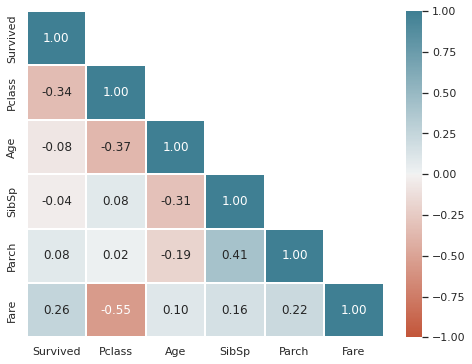

In [20]:
plt.figure(figsize=(8, 6))

mask = np.zeros_like(correlation_table)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(
    correlation_table,
    mask=mask,
    linewidths=.3,
    cmap=sns.diverging_palette(20, 220, as_cmap=True),
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f'
)

plt.show()

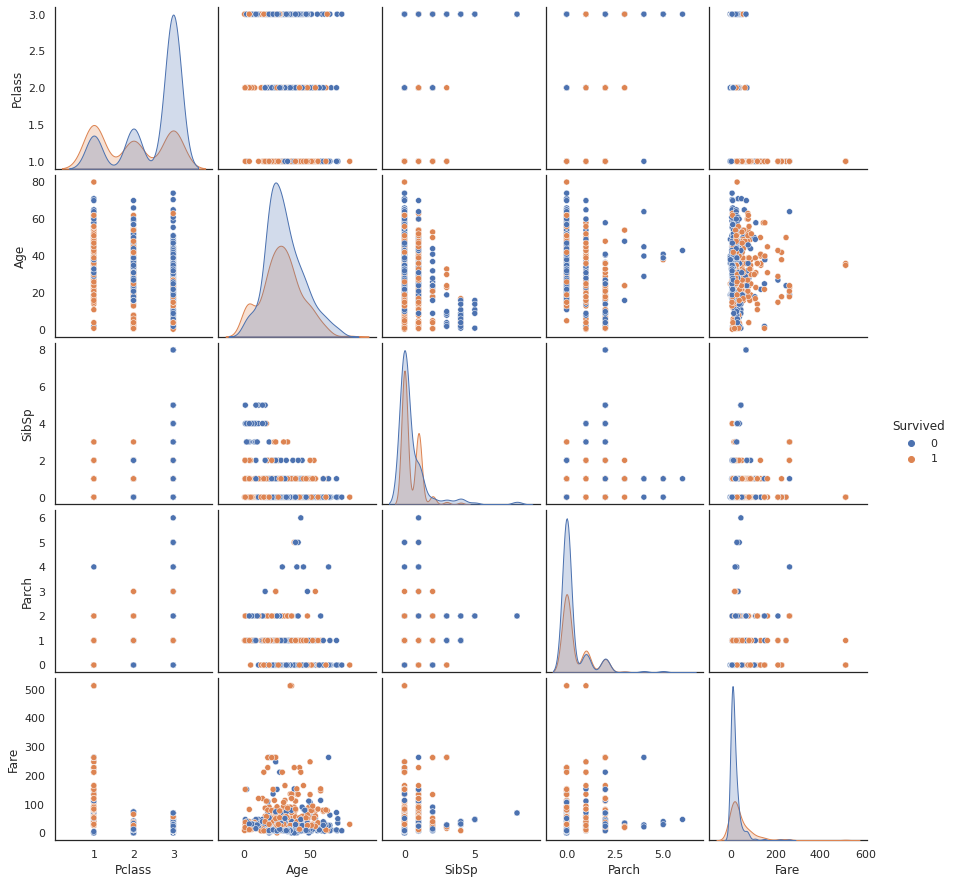

In [21]:
col_pairplot = ['Survived', 'Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare']
sns.pairplot(df_train[col_pairplot], hue='Survived')
plt.show()

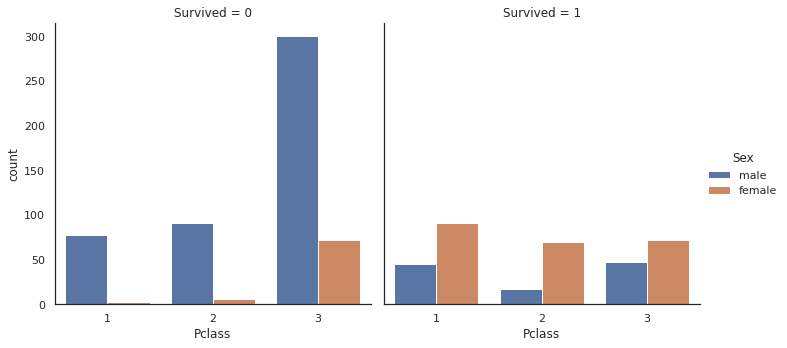

In [22]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=df_train, kind="count");

O número de mulheres sobreviventes é superior ao de homens em todas as classes. Praticamente não há mulheres mortas entre as viajantes de 1ª e 2ª classe.

Entre as classes, podemos notar uma diminuição da taxa de sobrevivência de acordo com a diminuição do padrão. Mesmo entre as mulheres, que no geral tiveram uma grande taxa de sobrevivência, na terceira classe quase metade não conseguiu sobreviver.

Para a próxima análise, vamos agrupar as idades em 4 faixas etárias:
- Bebês: de 0 a 5 anos
- Crianças: entre 6 e 15 anos
- Adultos: entre 16 e 59 anos
- Idosos: a partir de 60 anos

In [23]:
age_group = pd.cut(
    df_train.Age,
    bins=[0, 5, 15, 59, 99],
    labels=['Baby', 'Child', 'Adult', 'Elderly'],
    ordered=False
).rename('AgeGroup')

age_group.value_counts()

Adult      605
Baby        44
Child       39
Elderly     26
Name: AgeGroup, dtype: int64

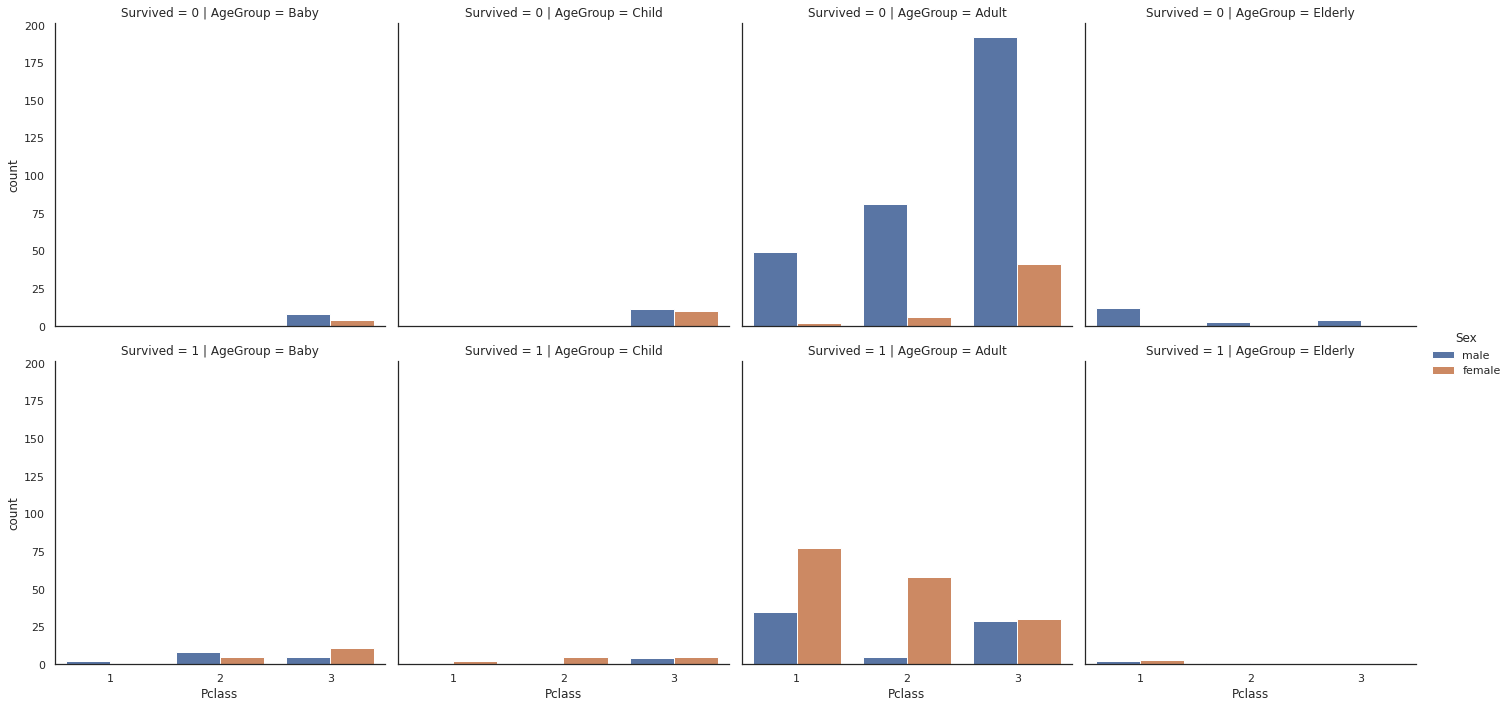

In [24]:
sns.catplot(
    data=pd.concat([df_train, age_group], axis=1),
    x="Pclass",
    hue="Sex",
    col="AgeGroup",
    row="Survived",
    kind="count"
);

Analisando conjuntamente os grupos etários, sexo e classe, temos que:
- Bebês tiveram uma alta taxa de sobrevivência, tendo alguns mortos apenas na 3ª classe.
- A maior parte das crianças viajantes eram da 3ª classe. Nenhuma das 1ª e 2ª classe morreram, mas na 3ª classe poucas conseguiram sobreviver.
- O maior grupo presente é de adultos entre 16 e 59 anos. Nestes, sobressai o salvamento de mulheres, sendo que apenas na 3ª classe houve mais mulheres mortas do que sobreviventes. Nota-se também que poucos homens da 2ª classe tiveram sorte em sobreviver.
- Entre os idosos, a grande maioria não sobreviveu, apenas poucos homens e mulheres da 1ª classe.

### 3.5. Resultados da análise

Três variáveis não foram objetos da análise exploratória: **Name**, **Ticket** e **Cabin**. As duas primeiras são identificadores que não acrescentam informação ao nosso objetivo. A variável *Cabin* poderia até, eventualmente, ter influência na chance de sobrevivência por conta de representar a localização do passageiro no navio. Porém, considerando que a maior parte dos valores é nulo e que sua relação não seria tão direta, optamos por não considerá-la.

Das demais variáveis analisadas, resumimos os achados a seguir.

#### 3.5.1. Variáveis numérica contínuas

- Em relação à variável **Age**, bebês e crianças muito novas (até 5 anos) têm uma alta taxa de sobrevivência. O número de  crianças (de 6 a 15 anos) que morreram é maior do que sobreviveram, mas em uma taxa não muito discrepante. Acima dos 16 anos, a proporção de mortos é bem maior do que sobreviventes.

- A correlação da variável **Fare** com *Survived* é de 0.26, indicando uma possível correlação fraca positiva. No gráfico de distribuição, temos que existe um ponto específico em que o número de sobreviventes passam os de não sobreviventes, podendo ser um indicativo de alguma separação dos dados.

#### 3.5.2. Variáveis numéricas discretas

- As variáveis **SibSp** e **Parch** possuem ambas um comportamento muito semelhante em relação à *Survived*. Visualmente, os casos em que os valores desses atributos são 0 possuem um volume de não sobreviventes superior aos demais. Temos um indício que ter um "conhecido" dentro do navio aumenta as chances de sobreviência.

#### 3.5.3. Variáveis Categóricas

- A variável **Pclass** possui a maior correlação com a variável alvo (-0.34), indicando que o aumento da classe da passagem (e consequente diminuição do padrão econômico) diminui as chances de sobrevivência do passageiro. Essa tese pode ser confirmada visualmente nos gráficos de correlação agrupados por classe acima. Essa variável também possui uma correlação com *Fare* (-0.55), sendo um indicio que elas podem adicionar uma multicolinearidade ao modelo se usadas em conjunto. 

- Quanto a **Sex**, o número de homens na base é superior ao de mulheres, porém o percentual de sobreviventes do sexo feminino é muito superior ao dos homens.

* Embora no gráfico de relação entre **Embarked** e *Survive* tenha-se uma distinção visual da influência do porto na variável dependente, o volume das amostras está bem desbalanceado.

#### 3.5.4. Conclusão

Em termos gerais, a máxima de *mulheres e crianças primeiro* se confirma nos dados de sobreviventes do desastre do Titanic.

Fica evidente também uma seletivadade no salvamento de passageiros com maior padrão social (pelo dado de classe e valor da tarifa).

O dado menos evidente é de salvamento de viajantes acompanhados, em geral das famílias com até 4 integrantes.

## 4. Pipeline de pré-processamento

Por não contribuírem com informações ao objetivo, as variáveis *Name*, *Ticket*, *Cabin* serão excluidas do modelo.

O atributo *Age* será convertido para categorias de faixas de idade. Para isto, vamos criar um transformador que realiza a operação.

A variável *Embarked* possui poucos valores nulos, que serão preenchidos com o valor mais frequente. Além disso, essa variável terá seus valores transformados em colunas binárias com a estratégia de *One Hot Encoding*.

Embora as variáveis númericas (*Fare*, *Parch* e *SibSp*) não possuam valores faltantes, será feita uma verificação caso apareça algum valor pendente para preenchecer com o valor mais frequente, além disso os dados serão normalizadas por meio da função *StandardScaler*

Por fim, *Sex* será transformada em uma coluna binária para facilitar o treinamento dos modelos.

Para realizar todas esses pré-processamento usaremos o *Pipeline* e *Column Transformer* do *Sklearn* para encapsular todas essas transformações.

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class AgeGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, bins=[0, 5, 15, 59, 99], labels=['Baby', 'Child', 'Adult', 'Elderly']):
        self.bins = bins
        self.labels = labels
    
    def group_by_age(self, x, y=None):
        return pd.cut(
            x,
            bins=self.bins,
            labels=self.labels,
            ordered=False
        )
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X).copy()
        X = X.apply(self.group_by_age)
        return X

In [26]:
# Bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Separação dos atributos
numerical_attributes = ['Fare', 'Parch', 'SibSp']
categorical_attributes = ['Embarked', 'Pclass']
binary_attributes = ['Sex']
age_attributes = ['Age']
drop_attributes = ['Name', 'Ticket', 'Cabin']

# Pipeline para "variáveis categóricas"
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot-encoding', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para "numéricos"
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scale_numerical', StandardScaler())
])

# Pipeline para Agrupar Idades
age_pipeline = Pipeline([
    ('age_grouper', AgeGrouper()),
    ('categorical', categorical_pipeline)
])

# Pipeline geral
prep_pipeline = ColumnTransformer([
    ('pipeline_numerical', numerical_pipeline, numerical_attributes),
    ('encode_categorical', categorical_pipeline, categorical_attributes),
    ('binary_feat', OneHotEncoder(drop='first'), binary_attributes),
    ('age_group', age_pipeline, age_attributes),
    ('drop_features', 'drop', drop_attributes),],
    remainder='drop')

## 5. Modelos de Aprendizado de Máquina

### 5.1. Preparação dos dados

Separando as variáveis e aplicando o pré-processamento

In [27]:
# Divisão da base de treino entre features e target
df_train_feature = df_train.drop(columns = ['Survived'])
df_train_target = df_train['Survived'].values
df_train_feature.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [28]:
df_train_pre = prep_pipeline.fit_transform(df_train_feature)

df_test_pre = prep_pipeline.fit_transform(df_test)

print(f'Dados Treino: {df_train_pre.shape}')
print(f'Dados Teste: {df_test_pre.shape}')

Dados Treino: (891, 14)
Dados Teste: (418, 14)


In [29]:
df_train_pre[0]

array([-0.50244517, -0.47367361,  0.43279337,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ])

### 5.2. Treinamento dos modelos

Para todos os modelos vamos utilizar  o [*GridSearchCV*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), de modo a procurar os melhores parâmetros e realizar a validação cruzada para verificar as métricas de avaliação com 5 folds

#### 5.2.1. Modelo 1 - KNeighborsClassifier

O primeiro modelo a ser utilizado será o [*KNeighborsClassifier*](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Vamos testar os seguintes parametros: 

* **n_neighbors**: Número de vizinhos usados - 5, 10, 15, 20, 25, 30
* **weights**: Função de peso usada para previsão - uniforme (pesos uniformes), distance (peso é o inverso da distância)
* **metric**: Métrica de distância - Euclidiana, Manhattan, Minkowski

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

num_folds = 5

KNN_grid_params = {'n_neighbors': [5,10,15,20,25,30], 
                   'weights': ['uniform', 'distance'], 
                   'metric': ['euclidean', 'manhattan','minkowski']}

KNN_model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = KNN_grid_params, cv=num_folds, scoring= "accuracy")

KNN_model.fit(df_train_pre,df_train_target)

KNN_best_params = KNN_model.best_params_
KNN_accuracy = KNN_model.best_score_

print(f'Melhores parametros: {KNN_best_params}')
print(f'Acurácia: {KNN_accuracy}')

Melhores parametros: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Acurácia: 0.8114430983616847


In [31]:
knn_final_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 30, weights =  'distance')
knn_final_model.fit(df_train_pre,df_train_target)
print(f'Score de Treino: {knn_final_model.score(df_train_pre,df_train_target)}')

knn_predict = knn_final_model.predict(df_test_pre)
knn_teste = pd.DataFrame({'PassengerId':df_test.index, 'Survived':knn_predict})
knn_teste.to_csv('knn_submission_teste.csv', index = False)

Score de Treino: 0.9349046015712682


#### 5.2.2. Modelo 2 - LogisticRegression

Para o modelo de [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) serão testados os seguintes parâmetros

* C: Inverso da força de regularização - 0.001, 0.01, 0.1, 1, 10, 100
* penalty: Norma de penalidade - none, l1, l2, elasticnet


In [32]:
from sklearn.linear_model import LogisticRegression

num_folds = 5

LR_grid_params = {'C':np.logspace(-3,2,6), 
                   'penalty': ['none','l2','l1','elasticnet']}

LR_model = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = LR_grid_params, cv=num_folds, scoring= "accuracy")

LR_model.fit(df_train_pre,df_train_target)

LR_best_params = LR_model.best_params_
LR_accuracy = LR_model.best_score_

print(f'Melhores parametros: {LR_best_params}')
print(f'Acurácia: {LR_accuracy}')

Melhores parametros: {'C': 1.0, 'penalty': 'l2'}
Acurácia: 0.8047266336074321


In [33]:
lr_final_model = LogisticRegression(C = 0.1, penalty = 'l2', random_state = 42)
lr_final_model.fit(df_train_pre,df_train_target)
print(f'Score de Treino: {lr_final_model.score(df_train_pre,df_train_target)}')

lr_predict = lr_final_model.predict(df_test_pre)
lr_teste = pd.DataFrame({'PassengerId':df_test.index, 'Survived':lr_predict})
lr_teste.to_csv('lr_submission_teste.csv', index = False)

Score de Treino: 0.8092031425364759


#### 5.2.3. Modelo 3 - DecisionTreeClassifier

Para o modelo [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) serão testados os seguintes parâmetros

* criterion: função que defini a qualidade da divisão - gini (impureza de Gini), entropy (ganho de informação)
* splitter: estratégia usada para escolher a divisão em casa nó - best, random
* max_depth: profundidade máxima da árvore de decisão - range(2, 5),
* min_samples_split: número mínimo de registros necessários para a divisão de um nó interno da árvore - range(5,10)
* min_samples_leaf: número de variáveis considerado para se analisar a melhor divisão de um nó - range(3,10)
* max_features: auto, sqrt, log2

In [34]:
from sklearn.tree import DecisionTreeClassifier

num_folds = 5

DTC_grid_params = {'criterion':['gini','entropy'],
                   'splitter':['best', 'random'],
                   'max_depth': range(2, 5),
                   'min_samples_split': range(5, 10),
                   'min_samples_leaf': range(3, 10),
                   'max_features':['auto', 'sqrt', 'log2']}

DTC_model = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), param_grid = DTC_grid_params, cv=num_folds, scoring= "accuracy")

DTC_model.fit(df_train_pre,df_train_target)

DTC_best_params = DTC_model.best_params_
DTC_accuracy = DTC_model.best_score_

print(f'Melhores parametros: {DTC_best_params}')
print(f'Acurácia: {DTC_accuracy}')

Melhores parametros: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
Acurácia: 0.7676793672713578


In [35]:
dtc_final_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3,
                                         max_features = 'auto', min_samples_leaf = 3, 
                                         min_samples_split = 5, splitter = 'random', random_state = 42)

dtc_final_model.fit(df_train_pre,df_train_target)
print(f'Score de Treino: {dtc_final_model.score(df_train_pre,df_train_target)}')

dtc_predict = dtc_final_model.predict(df_test_pre)
dtc_teste = pd.DataFrame({'PassengerId':df_test.index, 'Survived':dtc_predict})
dtc_teste.to_csv('dtc_submission_teste.csv', index = False)

Score de Treino: 0.7205387205387206


### 5.4. Avaliação dos modelos

Os três modelo foram submetidos na competição:

#### 5.4.1. KNN
![](../Image/knn_results.png)

#### 5.4.2. LogisticRegression
![](../Image/lr_results.png)

#### 5.4.3. DecisionTreeClassifier
![](../Image/dtc_results.png)

## 6. Conclusão

### 6.1. Discussão dos resultados

Embora o modelo KNN obteve a melhor acurácia nos dados de treino (0.924), seu resultado na base de teste não foi o melhor, podendo ser um indício de overfitting nos dados. 
O DecisionTreeClassifier apresentou o melhor resultado em relação aos dados de teste (0.770) e a acurácia de treino e teste ficou muito próxima (treino: 0.804 vs teste: 0.770). 
A Regressão logística teve um comportamente parecido com o DecisionTreeClassifier mas os resultados foram levemente inferiores.

### 6.2. Próximos passos

Os modelos apresentaram uma boa acurácia frente aos dados de testes, mas existem alguns caminhos que podem ser seguidos para aumentar esse valor:
* Criação de novas *features* a partir dos dados (Ex: agrupar as variáveis *SibSp* e *Parch* criando categorias que agrupam os valores)
* Tester outros modelos de machine learning (Ex:XGBoost, AdaBoostClassifier, SGDClassifer)
* Testar diferentes combinações de *features*